# 다중 선형 회귀

In [2]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential      # 순서층을 구성하는 모델 객체 생성 기능
from tensorflow.keras.layers import Dense           # 모델 객체에 학습을 위한 층을 쌓는다.
from tensorflow.keras.optimizers import RMSprop,SGD # 옵티마이저
from tensorflow.keras.losses import mse             # 활성화 함수
import pandas as pd 
import sys
import os
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
import helper


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# 학습에 대한 콜백함수 참조
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

## #02. 데이터 준비

In [3]:
origin = pd.read_excel('https://data.hossam.kr/F02/fish2.xlsx')
origin.head()

,길이,높이,두께,무게
0,8.4,2.11,1.41,5.9
1,13.7,3.53,2.00,32.0
2,15.0,3.82,2.43,40.0
3,16.2,4.59,2.63,51.5
4,17.4,4.59,2.94,70.0


## #03. 데이터 전처리

In [4]:
origin.isnull().sum()

길이    0
높이    0
두께    0
무게    0
dtype: int64

### 상자그림


<Axes: >

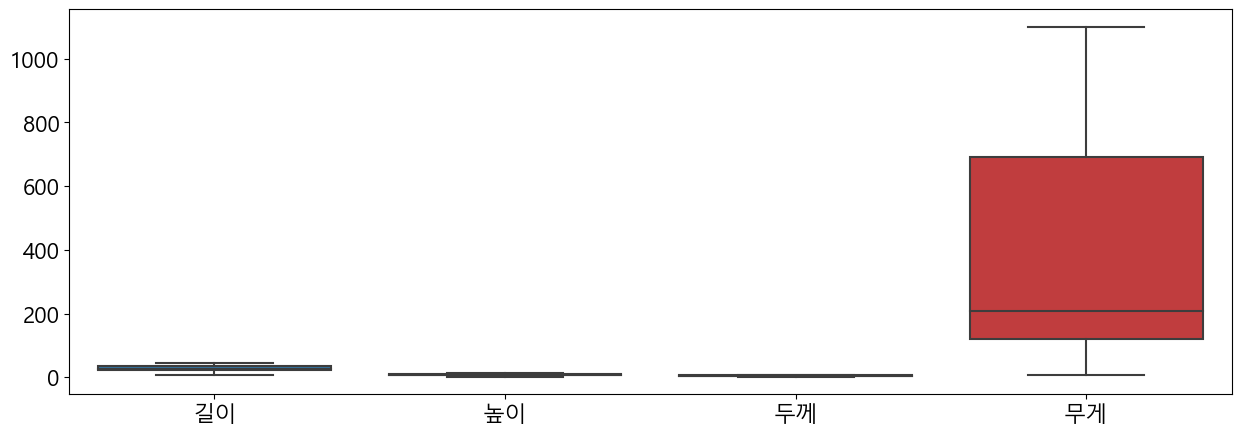

In [6]:
# 그래프 기본 설정
# ----------------------------------------
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(15,5))
sns.boxplot(data=origin)

### 산점도 그래프와 추세선 확인



C:\Users\hamin\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x2000 with 0 Axes>

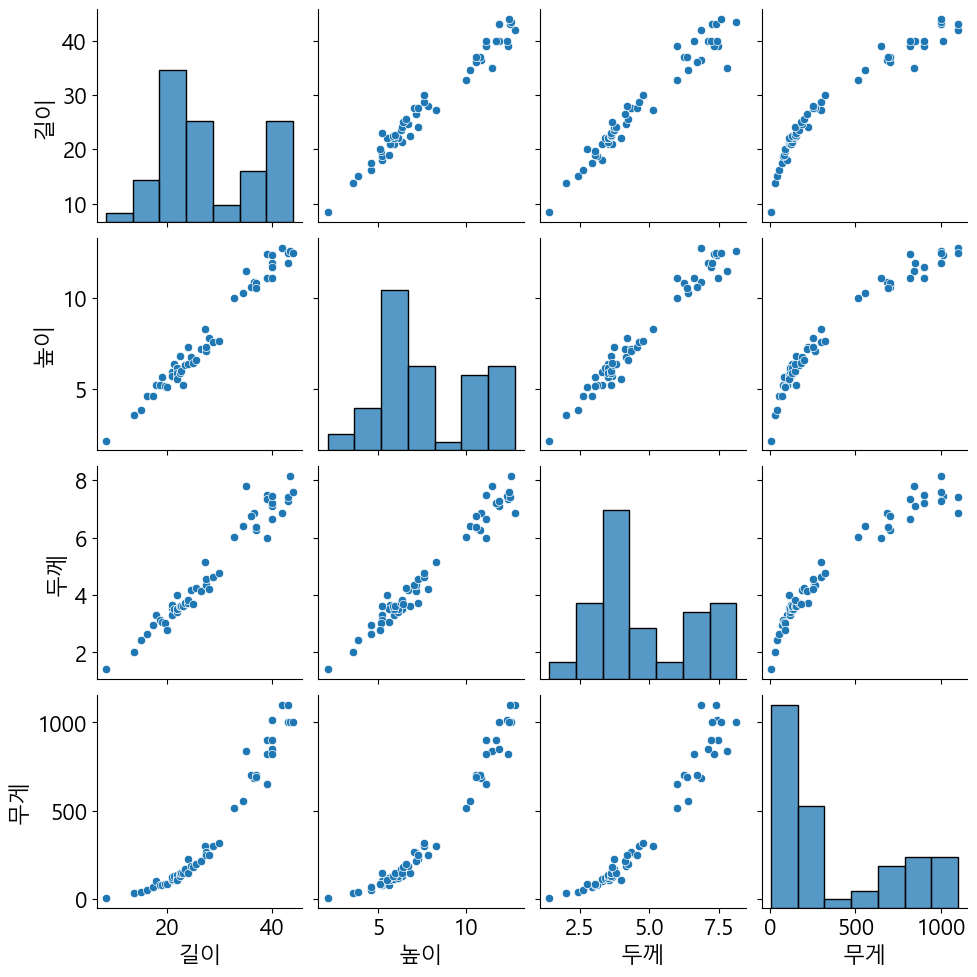

In [7]:


plt.figure(figsize=(20,20))
sns.pairplot(origin)


> 다중공선성이 발생할 것으로 보이고 선형회귀보다는 다항회귀가 적합해 보임(곡선형태기 떄문)

## #04. 데이터 확인

### 산점도 그래프와 추세선 확인



## #05. 데이터 분할

### 랜덤시드 고정

In [9]:
np.random.seed(777)

### 훈련데이터와 종속변수 구분


In [10]:
x = origin[['길이','높이','두께']]
y= origin[['무게']]
print('독립변수 : ',x.shape,'종속변수 : ',y.shape)

독립변수 :  (56, 3) 종속변수 :  (56, 1)


In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=777)
print(len(y_train),len(x_test))


39 17


In [12]:
x_scaler = StandardScaler()
y_scaler = StandardScaler()

x_scale = x_scaler.fit_transform(x)
y_scale = y_scaler.fit_transform(y)

x_scale.shape,y_scale.shape


((56, 3), (56, 1))

In [13]:
### 표준화 전 후 상자그림 비교 
x_scale_df = pd.DataFrame(x_scale,columns=['길이','높이','두께'])
y_scale_df = pd.DataFrame(y_scale,columns=['무게'])
tmp = pd.merge(x_scale_df,y_scale_df,left_index= True,right_index=True)
tmp.head()

,길이,높이,두께,무게
0,-2.180225,-2.016507,-1.896175,-1.092422
1,-1.587434,-1.518703,-1.560774,-1.016660
2,-1.442032,-1.417039,-1.316328,-0.993438
3,-1.307815,-1.147103,-1.202633,-0.960056
4,-1.173599,-1.147103,-1.026405,-0.906355


<Axes: >

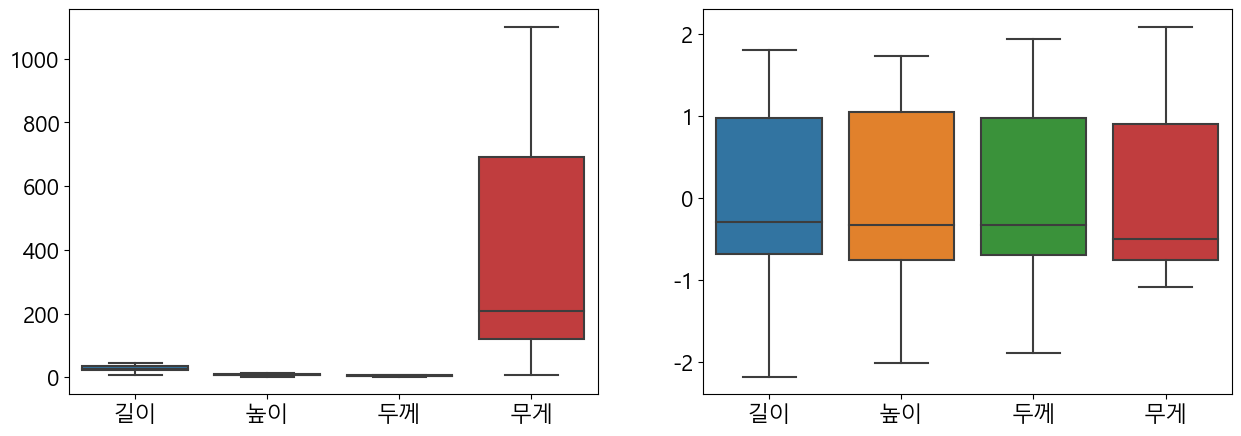

In [14]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(data=origin,ax=ax[0])
sns.boxplot(data=tmp,ax=ax[1])

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x_scale,y_scale,test_size=0.3,random_state=312)


## #06.모델개발
### 1.모델 정의

In [16]:
model = Sequential()
model.add(Dense(12,activation = 'relu',input_shape=(3,)))
model.add(Dense(6,activation = 'relu'))
model.add(Dense(1,activation='linear'))

model.compile(optimizer='adam',loss='mse',metrics = ['mae'])
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x00000234FBE35B80>>

### 2. 학습하기

In [17]:
result= model.fit(x_train,y_train, epochs=500,validation_data = (x_test,y_test),callbacks=[
    EarlyStopping(monitor='val_loss',patience=10,verbose=1),
    ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.5,min_lir=0.0001,verbose=1),
    ])



result_df = pd.DataFrame(result.history)
result_df['epochs'] = result_df.index + 1
result_df.set_index('epochs',inplace=True)
result_df

Epoch 1/500
2/2 [==============================] - 2s 458ms/step - loss: 1.0865 - mae: 0.9364 - val_loss: 0.9208 - val_mae: 0.8704 - lr: 0.0010
Epoch 2/500
2/2 [==============================] - 0s 58ms/step - loss: 1.0299 - mae: 0.9110 - val_loss: 0.8764 - val_mae: 0.8481 - lr: 0.0010
Epoch 3/500
2/2 [==============================] - 0s 64ms/step - loss: 0.9770 - mae: 0.8868 - val_loss: 0.8338 - val_mae: 0.8261 - lr: 0.0010
Epoch 4/500
2/2 [==============================] - 0s 75ms/step - loss: 0.9262 - mae: 0.8631 - val_loss: 0.7922 - val_mae: 0.8042 - lr: 0.0010
Epoch 5/500
2/2 [==============================] - 0s 154ms/step - loss: 0.8791 - mae: 0.8396 - val_loss: 0.7519 - val_mae: 0.7824 - lr: 0.0010
Epoch 6/500
2/2 [==============================] - 0s 89ms/step - loss: 0.8281 - mae: 0.8152 - val_loss: 0.7127 - val_mae: 0.7605 - lr: 0.0010
Epoch 7/500
2/2 [==============================] - 0s 95ms/step - loss: 0.7848 - mae: 0.7922 - val_loss: 0.6741 - val_mae: 0.7381 - lr: 0.00

,loss,mae,val_loss,val_mae,lr
epochs,,,,,
1,1.086548,0.936419,0.920810,0.870445,0.001000
2,1.029905,0.911001,0.876367,0.848064,0.001000
3,0.977025,0.886813,0.833791,0.826123,0.001000
4,0.926206,0.863086,0.792236,0.804246,0.001000
5,0.879150,0.839646,0.751865,0.782393,0.001000
...,...,...,...,...,...
238,0.107177,0.264887,0.100453,0.242230,0.000250
239,0.107083,0.264702,0.100451,0.242228,0.000250
240,0.106987,0.264583,0.100433,0.242206,0.000250


### 7) 학습 결과 평가
#### 1. 학습결과 시각화

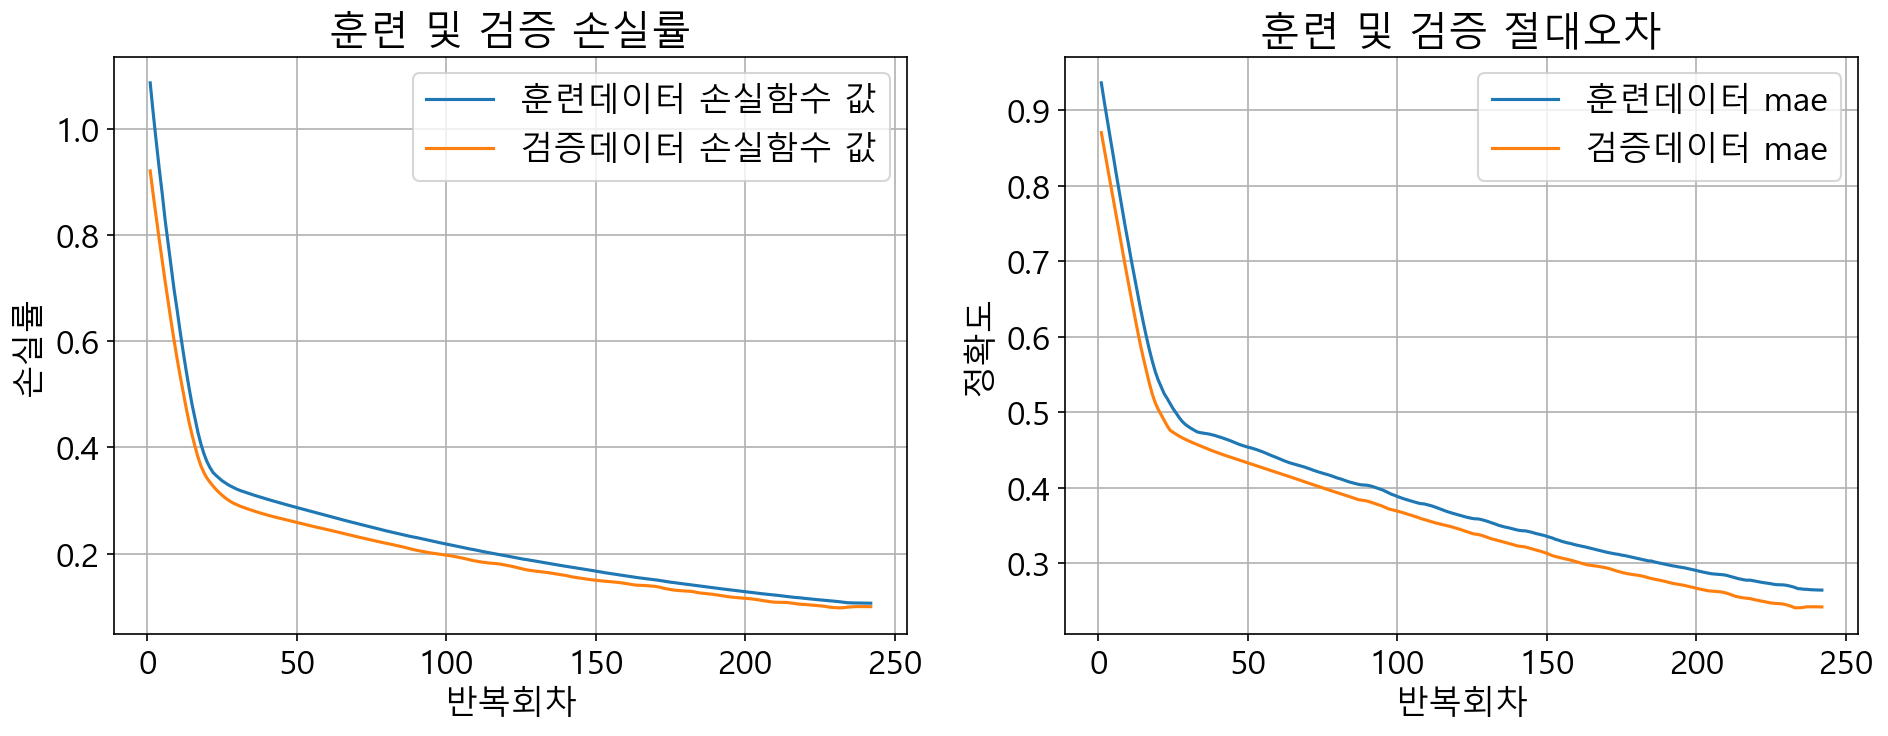

In [18]:
# 그래프 기본 설정
# ----------------------------------------
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False

# 그래프를 그리기 위한 객체 생성
# ----------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=150)

# 1) 훈련 및 검증데이터 손실함수 시각화
sns.lineplot(x=result_df.index , y='loss',data = result_df,label = '훈련데이터 손실함수 값',ax=ax1)
sns.lineplot(x=result_df.index , y= 'val_loss',data=result_df,label = '검증데이터 손실함수 값',ax=ax1)
ax1.set_title('훈련 및 검증 손실률')
ax1.set_xlabel('반복회차')
ax1.set_ylabel('손실률')
ax1.grid()
ax1.legend()
# 2) 훈련 및 검증 절대오차 그리기
sns.lineplot(x=result_df.index,y='mae',data=result_df,label='훈련데이터 mae',ax=ax2)
sns.lineplot(x=result_df.index,y='val_mae',data=result_df,label='검증데이터 mae',ax=ax2)

ax2.set_title('훈련 및 검증 절대오차')
ax2.set_xlabel('반복회차')
ax2.set_ylabel('정확도')
ax2.grid()
ax2.legend()

plt.show()
plt.close()

#### 2. 모델 성능 평가

In [19]:
evaluate1 = model.evaluate(x_train,y_train)

evaluate2 = model.evaluate(x_test,y_test)
print("최종 훈련 손실률: %f, 최종 훈련 절대오차: %f" % (evaluate1[0], evaluate1[1]))
print("최종 훈련 손실률: %f, 최종 훈련 절대오차: %f" % (evaluate2[0], evaluate2[1]))



1/1 [==============================] - 0s 72ms/step - loss: 0.1003 - mae: 0.2420
최종 훈련 손실률: 0.106770, 최종 훈련 절대오차: 0.264301
최종 훈련 손실률: 0.100298, 최종 훈련 절대오차: 0.242036


## #08. 학습 결과 적용
### 1. 테스트 데이터에 대한 예측 결과 산정

In [20]:
results = model.predict(x_test)
print(results)

1/1 [==============================] - 0s 133ms/step
[[-0.38419276]
 [ 1.4125085 ]
 [-0.38419276]
 [-0.38419276]
 [ 0.92567796]
 [-0.34383112]
 [ 1.4582081 ]
 [ 0.8800718 ]
 [-0.38419276]
 [-0.38419276]
 [-0.38419276]
 [-0.38419276]
 [-0.38419276]
 [ 1.0014257 ]
 [ 1.3993237 ]
 [-0.38419276]
 [-0.38419276]]


### 2. 결과 데이터 구성

In [27]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

1/1 [==============================] - 0s 42ms/step


In [28]:
train_df = pd.DataFrame(x_train,columns = ['길이','높이','두께'])
train_df['무게(관측치)'] = y_train.flatten()
train_df['무게(예측치)'] = train_pred.flatten()

train_df['훈련오차'] = train_df['무게(관측치)'] - train_df['무게(예측치)']

train_df.head()

,길이,높이,두께,무게(관측치),무게(예측치),훈련오차
0,0.738992,0.840608,0.934840,0.504385,0.673920,-0.169535
1,1.745618,1.660933,1.929674,1.793210,2.036100,-0.242890
2,1.354152,1.149106,1.071274,1.270713,1.223656,0.047057
3,-0.435406,-0.519589,-0.526146,-0.688648,-0.384193,-0.304455
4,-0.659101,-0.614242,-0.759221,-0.761217,-0.384193,-0.377024


In [30]:
test_df = pd.DataFrame(x_test,columns = ['길이','높이','두께'])
test_df['무게(관측치)'] = y_test.flatten()
test_df['무게(예측치)'] = test_pred.flatten()

test_df['훈련오차'] = test_df['무게(관측치)'] - test_df['무게(예측치)']

test_df.head()

,길이,높이,두께,무게(관측치),무게(예측치),훈련오차
0,-0.155787,-0.242642,-0.344233,-0.476747,-0.384193,-0.092554
1,1.354152,1.355940,1.406676,1.502934,1.412508,0.090425
2,-0.323559,-0.498555,-0.605732,-0.587052,-0.384193,-0.202859
3,0.011984,-0.014774,-0.310124,-0.383859,-0.384193,0.000334
4,0.906763,0.963306,1.133807,0.922382,0.925678,-0.003296


### 3. 실제 결과값과 머신러닝에 의한 예측값 비교

<Axes: xlabel='두께', ylabel='무게(예측치)'>

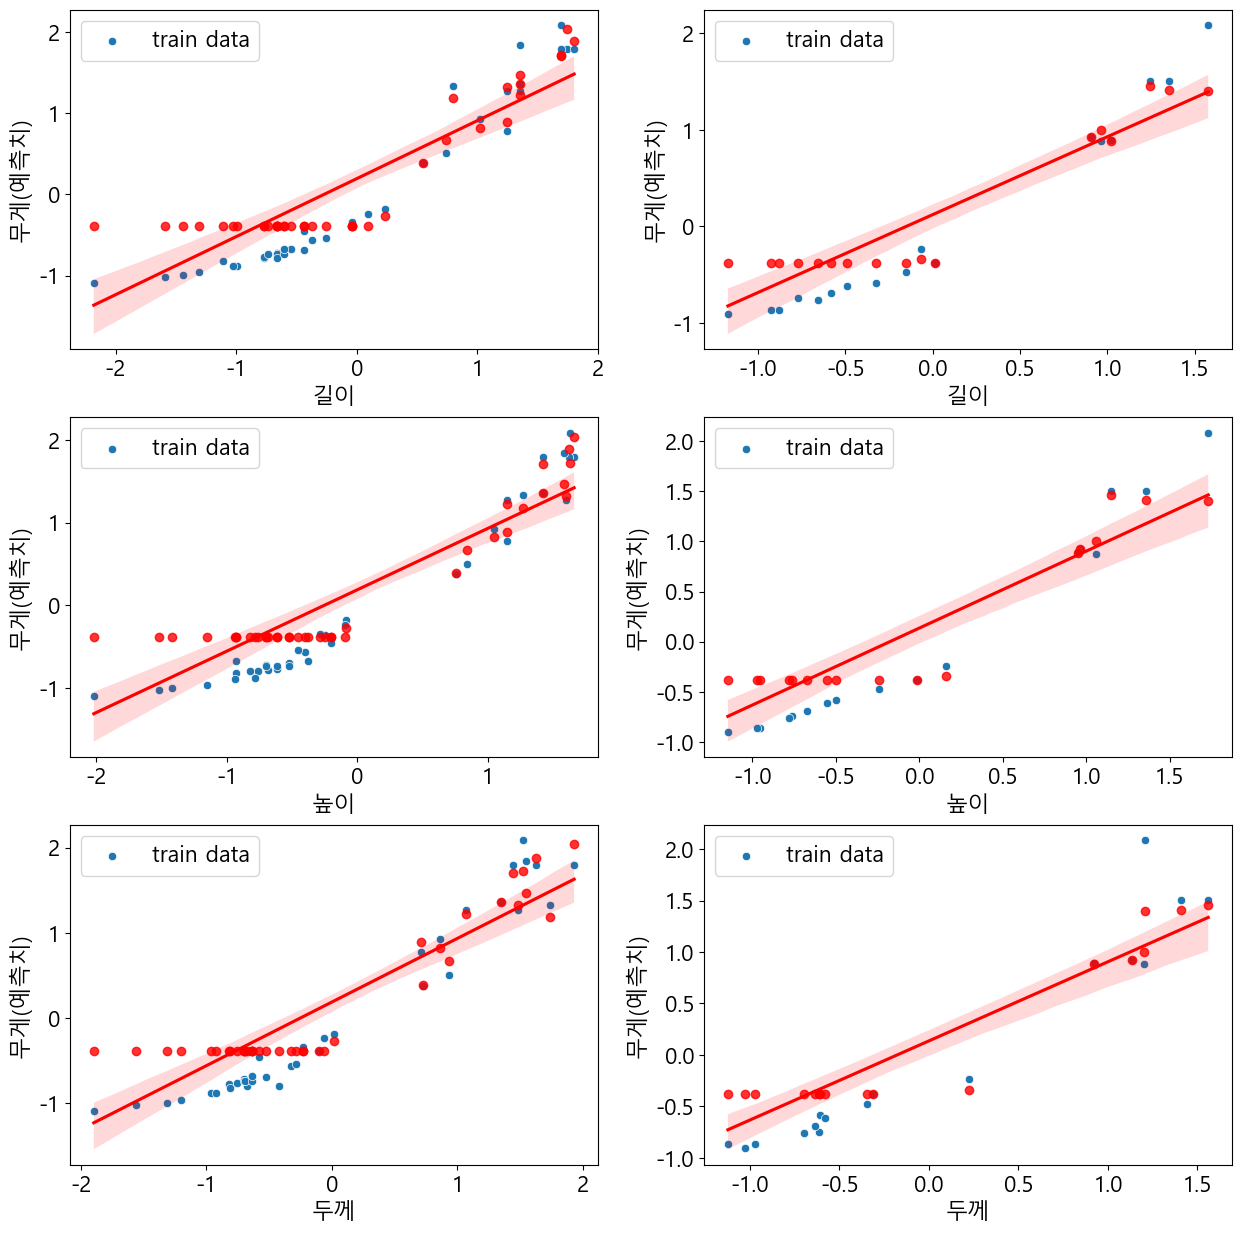

In [47]:
fig,ax = plt.subplots(3,2,figsize=(15,15))
## 관측치 시각화
sns.scatterplot(x=train_df['길이'],y=train_df['무게(관측치)'],label = 'train data',ax=ax[0][0])
# ## 관측치 선그래프
sns.regplot(x=train_df['길이'],y=train_df['무게(예측치)'],ax=ax[0][0],color='red')
## 관측치 시각화
sns.scatterplot(x=train_df['높이'],y=train_df['무게(관측치)'],label = 'train data',ax=ax[1][0])
# ## 관측치 선그래프
sns.regplot(x=train_df['높이'],y=train_df['무게(예측치)'],ax=ax[1][0],color='red')
## 관측치 시각화
sns.scatterplot(x=train_df['두께'],y=train_df['무게(관측치)'],label = 'train data',ax=ax[2][0])
# ## 관측치 선그래프
sns.regplot(x=train_df['두께'],y=train_df['무게(예측치)'],ax=ax[2][0],color='red')

## 관측치 시각화
sns.scatterplot(x=test_df['길이'],y=test_df['무게(관측치)'],label = 'train data',ax=ax[0][1])
# ## 관측치 선그래프
sns.regplot(x=test_df['길이'],y=test_df['무게(예측치)'],ax=ax[0][1],color='red')
## 관측치 시각화
sns.scatterplot(x=test_df['높이'],y=test_df['무게(관측치)'],label = 'train data',ax=ax[1][1])
# ## 관측치 선그래프
sns.regplot(x=test_df['높이'],y=test_df['무게(예측치)'],ax=ax[1][1],color='red')
## 관측치 시각화
sns.scatterplot(x=test_df['두께'],y=test_df['무게(관측치)'],label = 'train data',ax=ax[2][1])
# ## 관측치 선그래프
sns.regplot(x=test_df['두께'],y=test_df['무게(예측치)'],ax=ax[2][1],color='red')




# ## 예측치 시각화
# sns.scatterplot(x=kdf['검증데이터'],y=kdf['예측값'],label = '예측값')
# # ## 예측치 선그래프
# sns.regplot(x=kdf['검증데이터'],y=kdf['예측값'])



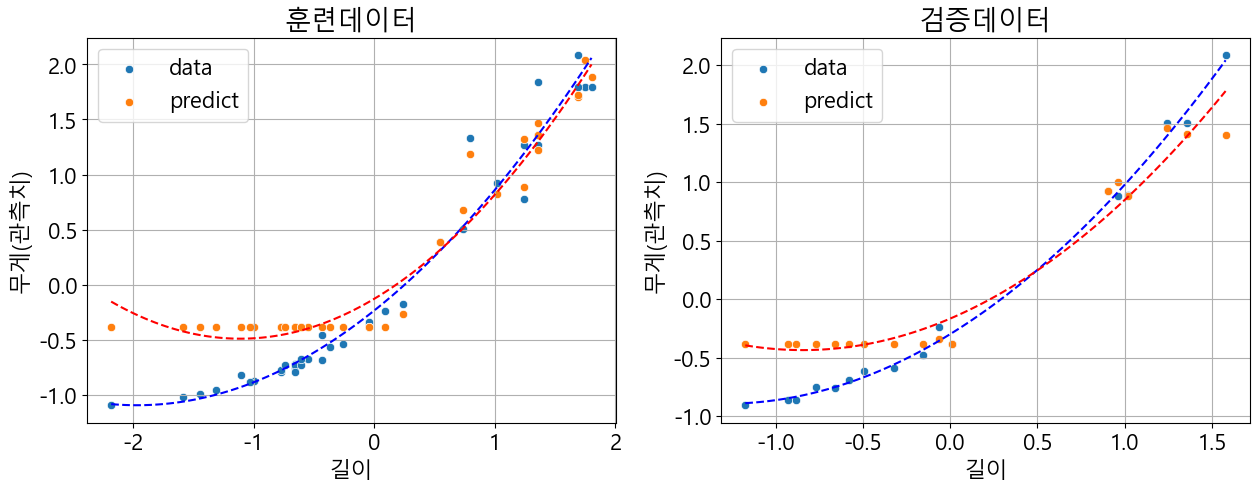

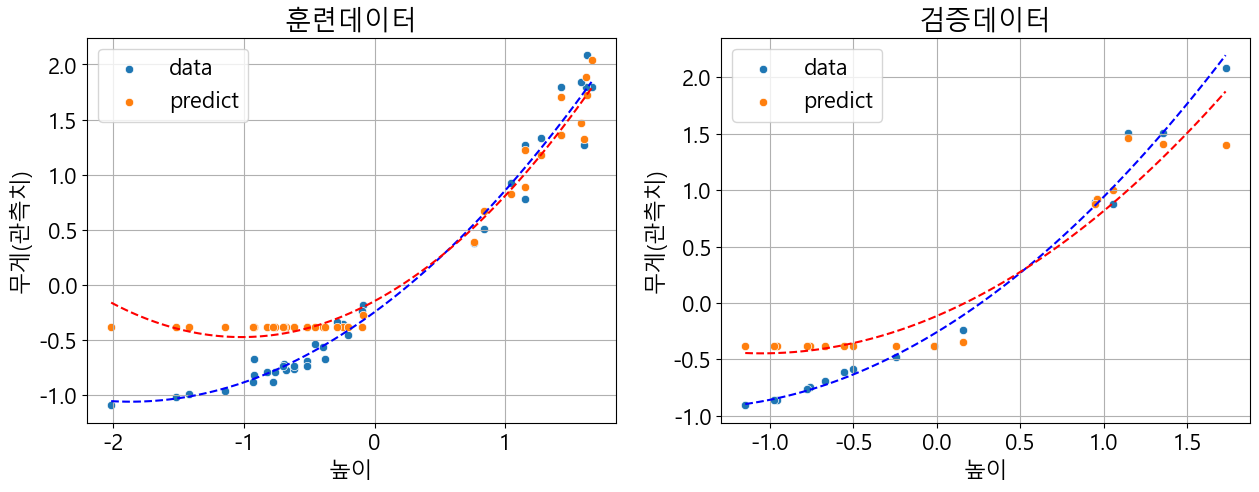

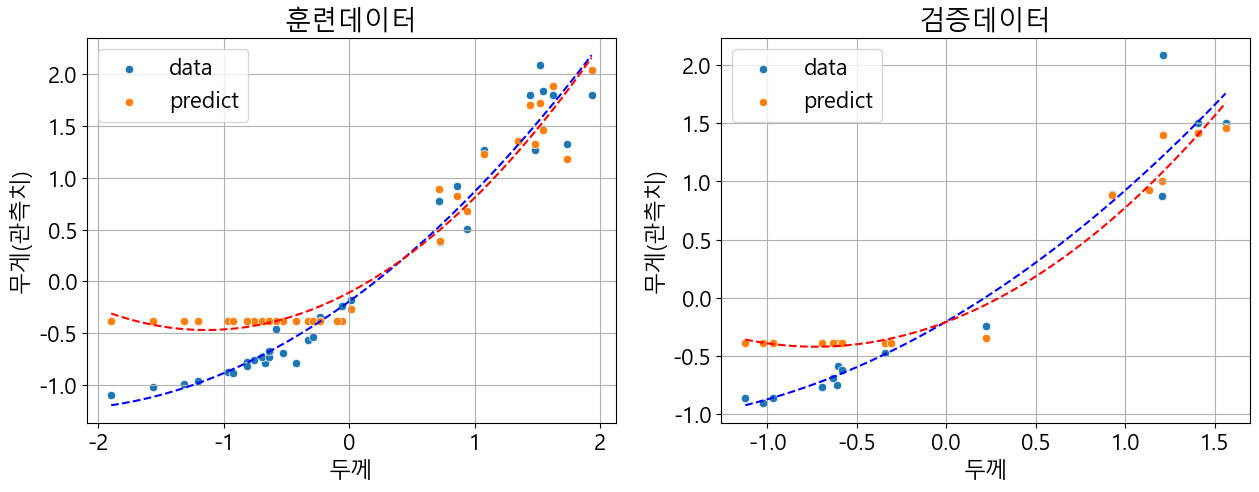

In [48]:
for key in ['길이','높이','두께']:
    helper.regplot(train_df[key], train_df['무게(관측치)'], train_df['무게(예측치)'], "훈련데이터",
                   test_df[key], test_df['무게(관측치)'], test_df['무게(예측치)'], "검증데이터",
                   figsize=(15, 5))

### 3. 임의의 값에 대한 머신러닝 예측 결과


In [107]:
speed= [50] 
my_speed = pd.DataFrame(speed,columns=['speed'])
my_speed

,speed
0,50


In [108]:

my_speed[['speed']] = scaler.fit_transform(my_speed[['speed']])
results= model.predict(my_speed['speed'])
results
# print("속도가 %d인 자동차의 제동거리는 %d로 예상됩니다." % (my_speed, results))

1/1 [==============================] - 0s 244ms/step


array([[0.16378003]], dtype=float32)

In [112]:
result_final = scaler.inverse_transform(results)

In [113]:
result_final

array([[50.16378]], dtype=float32)